タイトル　日本は強い地震は多いのか
説明　過去一か月間のデータの中、日本で起きた地震の数と起きた地震の中でマグニチュード5以上の地震の割合を世界の国々と比べてどれぐらい多いか、少ないか視覚化した。横軸に地震の起きた総数。縦軸にマグニチュード5以上の地震の数を地震の総数で割った値。

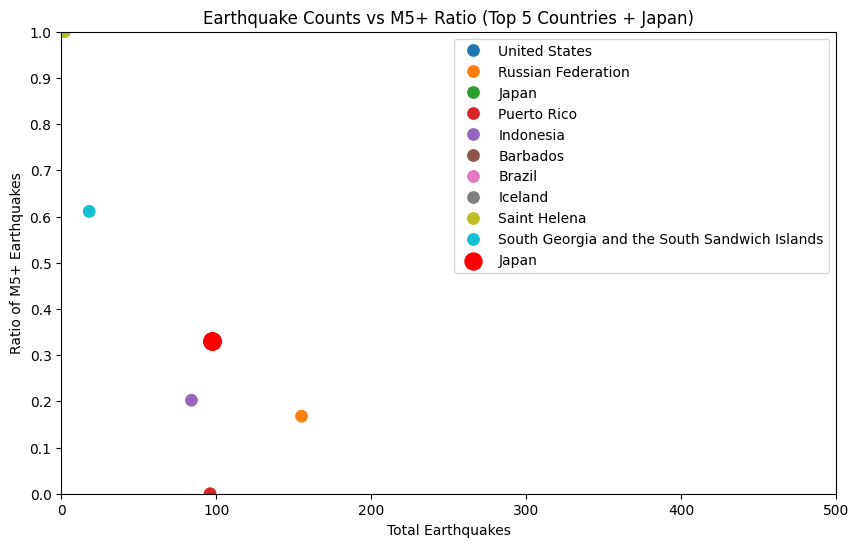

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import reverse_geocode

# データ読み込み
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# 緯度経度から国を判定（リスト全体を渡す）
coords = list(zip(df['latitude'], df['longitude']))
results = reverse_geocode.search(coords)
countries = [r['country'] for r in results]
df['country'] = countries

# 総数とM5以上の数を集計
summary = df.groupby('country').agg(
    total=('mag', 'count'),
    mag5plus=('mag', lambda x: (x >= 5).sum())
)
summary['ratio'] = summary['mag5plus'] / summary['total']

# 上位5か国＋日本（総数）
top_total = summary.sort_values('total', ascending=False).head(5)
japan = summary.loc[['Japan']]
df_total = pd.concat([top_total, japan])

# 上位5か国＋日本（割合）
top_ratio = summary.sort_values('ratio', ascending=False).head(5)
df_ratio = pd.concat([top_ratio, japan])

# 散布図作成
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='total', y='ratio',
    data=pd.concat([df_total, df_ratio]),
    hue=pd.concat([df_total, df_ratio]).index,
    palette='tab10', s=100
)

# 日本を赤で強調
if 'Japan' in pd.concat([df_total, df_ratio]).index:
    jp = pd.concat([df_total, df_ratio]).loc['Japan']
    plt.scatter(jp['total'], jp['ratio'], color='red', s=150, label='Japan')

# 軸の範囲と目盛りを設定
plt.xlim(0, 500)                       # 横軸を0〜500に固定
plt.xticks(range(0, 501, 100))         # 100ごとに目盛り
plt.ylim(0, 1)                         # 縦軸を0〜1に固定
plt.yticks([i/10 for i in range(0, 11)])  # 0.1ごとに目盛り

plt.title("Earthquake Counts vs M5+ Ratio (Top 5 Countries + Japan)")
plt.xlabel("Total Earthquakes")
plt.ylabel("Ratio of M5+ Earthquakes")
plt.legend()
plt.show()
